In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# MLE for Bernoulli distributions

Assuming that we have $N=1000$ samples $(x_1,\ldots,x_N)$ from a Bernoulli distribution, the objective is to compute the log probability of having observed $(x_1,\ldots,x_N)$ for any parameter $p$ of the Bernoulli distribution. We will then show that the MLE of $p$, which as we saw during the lecture is given by
$$
\hat{p}=\frac{\sum_{i+1}^N x_i}{N},
$$
lies at the global maximum of the log probability function.

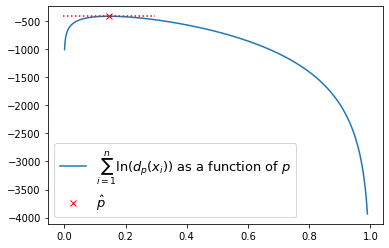

In [3]:
# function returning the log probability of the observation as a parameter of p (and the observations)
def log_prob_bern(p, obs):
    # returns an array of p's for an observation x_i=1 and 0 else
    tensor = np.tensordot(p, obs, axes = 0)
    # returns an array of (1-p)'s for an observation x_i=0 and 0 else
    tensor1 = np.tensordot(1 - p, np.mod(obs + 1,2), axes = 0)
    if len(tensor.shape)>1:
        return np.sum(np.log(tensor + tensor1),axis = 1)
    else:
        return np.sum(np.log(tensor + tensor1))
    

true_p = np.pi - 3
N = 1000
seed = 101
# sample from the true p
obs = stats.bernoulli.rvs(true_p, size = N, random_state = seed)
# compute sum of log probabilities
p = np.linspace(0.001,0.99,N)
lp = log_prob_bern(p, obs)
# compute mle
mle = np.sum(obs) / N
# plot log probabilities as a function of p together with mle
plt.plot(p, lp, label = r'$\sum_{i=1}^n \ln(d_p(x_i))$ as a function of $p$')
pl_mle = log_prob_bern(mle, obs)
plt.plot(mle, pl_mle, 'x', color = 'red', label = r'$\hat{p}$')
plt.plot(np.linspace(mle-0.15, mle+0.15, 100), np.zeros(100) + pl_mle, color = 'red', linestyle = 'dotted')
plt.legend(fontsize = 13)
plt.show()

# MLE for normal distributions

Assuming that we have $N=100$ samples $(x_1,\ldots,x_N)$ from a normal distribution, the objective is to compute the log density of $(x_1,\ldots,x_N)$ for any parameter $(\mu,\sigma)$ of the normal distribution. We will then show that the MLE of $(\mu,\sigma^2)$, which is given by
$$
\hat{\mu}=\frac{\sum_{i+1}^N x_i}{N}, \hat{\sigma}^2 = \frac{\sum_{i+1}^N (x_i-\hat{\mu})^2}{N}
$$
lies at the global maximum of the log density function.

MLE \mu = 3.2379563490019665
MLE \sigma = 2.844004213086391


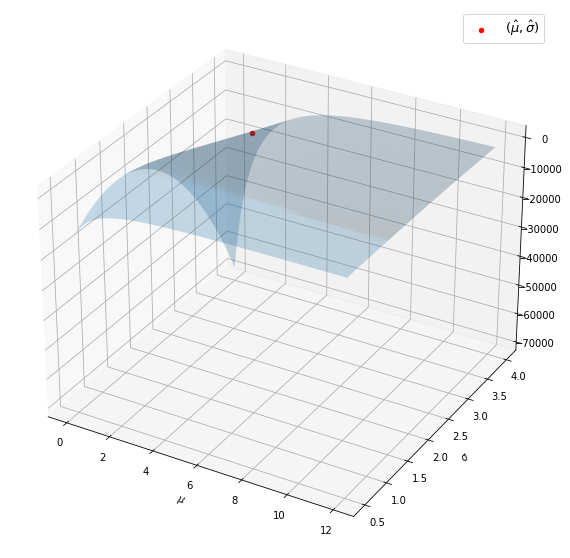

In [4]:
# function computing the sum of the log of the density as parameters of \mu, \sigma (and the observations)
def log_prob_norm(X, Y, obs):
    if len(X.shape)>1:
        Obs = np.tensordot(obs, np.ones(X.shape[0]), axes = 0)
        X = (X - Obs)**2
        X = - np.tensordot(X, 1/(2*Y**2), axes = 0)
        LP = X - np.log(np.sqrt(2*np.pi)) - np.log(Y)
        return np.sum(LP, axis = 0)
    else:
        X = (X - obs)**2
        X = - X / (2*Y**2)
        LP = X - np.log(np.sqrt(2*np.pi)) - np.log(Y)
        return np.sum(LP)
    
    

true_mu = np.pi 
true_sigma = np.e
N = 400
seed = 101
# sample from the true distribution
obs = stats.norm.rvs(loc = true_mu, scale = true_sigma, size = N, random_state = seed)

# compute sum of log probabilities
mu = np.linspace(0, 12, N)
sigma = np.linspace(0.5, 4, N)
X, Y = np.meshgrid(mu, sigma)
lp = log_prob_norm(X, sigma, obs)

# compute mle
mle_mu = np.mean(obs)
mle_sigma = np.std(obs)
print('MLE \mu = {mu}'.format(mu = mle_mu))
print('MLE \sigma = {sigma}'.format(sigma = mle_sigma))


# plot log probabilities as a function of p together with mle
plt.fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.plot_surface(X, Y, lp, alpha = 0.25)
pl_mle = log_prob_norm(mle_mu, mle_sigma, obs)
ax.scatter3D(mle_mu, mle_sigma, pl_mle, 'o', color = 'red', label = r'$(\hat{\mu},\hat{\sigma})$')
plt.legend(fontsize = 13)
plt.show()

# Automatic distribution fitting via Maximum Likelihood Estimation.

We now run the same experiment as above, but this time using the fit() method of scipy.stats continuous distributions.

MLE \mu = 3.2379563490019665
MLE \sigma = 2.844004213086391


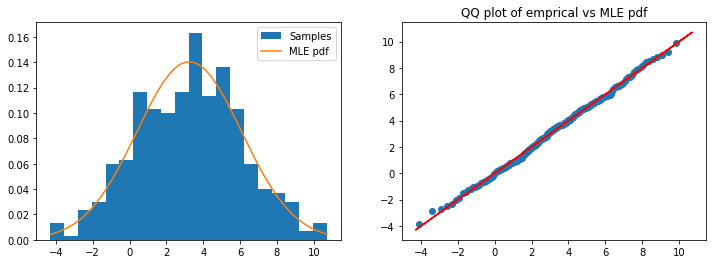

In [7]:
true_mu = np.pi 
true_sigma = np.e
N = 400
seed = 101

# sample from the true distribution
obs = stats.norm.rvs(loc = true_mu, scale = true_sigma, size = N, random_state = seed)

# Compute Maximum Likelihood Estimators for \mu and \sigma using fit() method
MLE_params = stats.norm.fit(obs)
print('MLE \mu = {mu}'.format(mu = MLE_params[0]))
print('MLE \sigma = {sigma}'.format(sigma = MLE_params[1]))

# Plot histogram of samples versus optimal distribution
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.hist(obs, int(np.sqrt(N)), density = True, label='Samples')
x = np.linspace(np.min(obs), np.max(obs), 1000)
y = stats.norm.pdf(x, MLE_params[0], MLE_params[1])
ax1.plot(x,y, label = 'MLE pdf')
ax1.legend()

# Plot QQ plot
percent = np.arange(0.5, 99.5, 0.5)
percentile1 = stats.norm.ppf(percent / 100, MLE_params[0], MLE_params[1])
percentile2 = np.percentile(obs, percent)
ax2.scatter(percentile1, percentile2)
ax2.plot(obs,obs,color='red')
ax2.set_title('QQ plot of emprical vs MLE pdf')
plt.show()